# Project 2 - Ames Housing Data
## Part 1: Data Cleaning and EDA


### Problem Statement

We are provided with a dataset including 80 features and 2,051 residential sales provided by the Ames City Assessor’s Office. Our goal is to build a model that can accurately predict housing prices in Ames, Iowa.

### Executive Summary

I will begin by importing and cleaning the data, which will include imputation and feature engineering. Next, I will use exploratory data analysis and data visualization to investigate our dataset and identify key features prior to model building. Next, in a new notebook, I will use the cleaned and feature engineered data to build three versions of a Ridge Regression model using various preprocessors. Finally, in conclusions, I will identify uses for each type of model, as well as overall findings.

### Contents
- [Obtain and Inspect the Data](#Obtain-and-Inspect-the-Data)
- [Data Cleaning](Data-Cleaning)
- [Checking for Incorrect Values](#Checking-for-Incorrect-Values)
- [Feature Engineering](Feature-Engineering)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Additional Data Cleaning and Feature Engineering](#Additional-Data-Cleaning-and-Feature-Engineering)


### Obtain and inspect the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ames_df = pd.read_csv('./datasets/train.csv')

In [3]:
ames_df_test = pd.read_csv('./datasets/test.csv')

In [4]:
# Source: Jhttps://medium.com/@jobethmuncy/different-ways-to-view-a-pandas-dataframe-528d193b7320
pd.set_option('display.max_columns', None)
ames_df.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [5]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
ames_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

### Data Cleaning

There are several cases of missing data in both our train and test dataframes. In order to find the best values for imputing, I combed through the data dictionary and assessed each column that had missing values. Based on the information provided, the best assumption is that a missing value equates to nonexistence. For example, if Total Bsmt SF is blank, it is most likely because the house does not have a basement. 

What follows is an assessment of the best imputation value for each column with missing information:

**Numeric columns** to impute with 0: lot frontage, Mas Vnr Area, BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Bsmt Full Bath, Bsmt Half Bath, Garage Cars, Garage Area 

**Numeric columns** to impute by Min value: Garage Yr Blt

**Categorical columns** to impute with None: Mas Vnr Area   

**Categorical columns** to impute with NA: Alley, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type1, BsmtFin Type2, Fireplace Q, Garage Type, Garage Finish, Garage Qual, Garage Cond, Pool QC, Fence, Misc Feature

In [7]:
pd.DataFrame(ames_df.loc[1554]).T

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1554,1247,535302130,20,RL,102,9373,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1953,1953,Gable,CompShg,MetalSd,MetalSd,BrkFace,84,TA,TA,CBlock,TA,TA,No,Rec,500,LwQ,196,456,1152,GasA,TA,Y,SBrkr,1152,0,0,1152,0,0,1,1,3,1,TA,6,Typ,0,NaN,Detchd,1971,Unf,2,636,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,137500


In [8]:
# replace garage yr blt blanks with 1895, oldest year (effectively saying of garage is old is is of less value, these are of the least value)
ames_df['Garage Yr Blt'] = ames_df['Garage Yr Blt'].replace(np.nan, 1895)

In [9]:
# replace all other blank numerical cells with 0
ames_df_num = ames_df.select_dtypes(exclude='object').replace(np.nan, 0)

In [10]:
# replace one categorical column that uses None instead of NA
ames_df['Mas Vnr Type'] = ames_df['Mas Vnr Type'].replace(np.nan, 'None')

In [11]:
# replace all categorical blanks with NA
ames_df_cat = ames_df.select_dtypes(include='object').replace(np.nan, 'NA')

In [12]:
ames_df_nona = pd.concat([ames_df_cat, ames_df_num],axis=1)
ames_df_nona.head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,109,533352170,60,0.0,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500
1,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000
2,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NA,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010,109000
3,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NA,BuiltIn,Fin,TA,TA,Y,NA,NA,NA,WD,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,0,4,2010,174000
4,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NA,Detchd,Unf,TA,TA,N,NA,NA,NA,WD,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,0,3,2010,138500


In [13]:
# test data: replace garage yr blt blanks with 1895, oldest year
ames_df_test['Garage Yr Blt'] = ames_df_test['Garage Yr Blt'].replace(np.nan, 1895)

In [14]:
# test data: replace all other blank numerical cells with 0
ames_df_test_num = ames_df_test.select_dtypes(exclude='object').replace(np.nan, 0)

In [15]:
# test data: replace one categorical column that uses None instead of NA
ames_df_test['Mas Vnr Type'] = ames_df_test['Mas Vnr Type'].replace(np.nan, 'None')

In [16]:
# replace all categorical blanks with NA
ames_df_test_cat = ames_df_test.select_dtypes(include='object').replace(np.nan, 'NA')

In [17]:
ames_df_test_nona = pd.concat([ames_df_test_cat, ames_df_test_num],axis=1)
ames_df_test_nona.head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,Gable,CompShg,AsbShng,AsbShng,None,TA,Fa,Stone,Fa,TA,No,Unf,Unf,GasA,Gd,N,FuseP,Fa,Typ,NA,Detchd,Unf,Po,Po,Y,NA,NA,NA,WD,2658,902301120,190,69.0,9142,6,8,1910,1950,0.0,0,0,1020,1020,908,1020,0,1928,0,0,2,0,4,2,9,0,1910.0,1,440,0,60,112,0,0,0,0,4,2006
1,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,Gd,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NA,Attchd,Fin,TA,TA,Y,NA,NA,NA,WD,2718,905108090,90,0.0,9662,5,4,1977,1977,0.0,0,0,1967,1967,1967,0,0,1967,0,0,2,0,6,2,10,0,1977.0,2,580,170,0,0,0,0,0,0,8,2006
2,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,Gd,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NA,NA,NA,New,2414,528218130,60,58.0,17104,7,5,2006,2006,0.0,554,0,100,654,664,832,0,1496,1,0,2,1,3,1,7,1,2006.0,2,426,100,24,0,0,0,0,0,9,2006
3,RM,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,Gd,TA,CBlock,TA,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NA,Detchd,Unf,Fa,TA,N,NA,NA,NA,WD,1989,902207150,30,60.0,8520,5,6,1923,2006,0.0,0,0,968,968,968,0,0,968,0,0,1,0,2,1,5,0,1935.0,2,480,0,0,184,0,0,0,0,7,2007
4,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,BrkFace,TA,TA,CBlock,Gd,TA,No,BLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Gd,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,625,535105100,20,0.0,9500,6,5,1963,1963,247.0,609,0,785,1394,1394,0,0,1394,1,0,1,1,3,1,6,2,1963.0,2,514,0,76,0,0,185,0,0,7,2009


In [18]:
ames_df_nona.isna().sum()

MS Zoning       0
Street          0
Alley           0
Lot Shape       0
Land Contour    0
               ..
Pool Area       0
Misc Val        0
Mo Sold         0
Yr Sold         0
SalePrice       0
Length: 81, dtype: int64

### Checking for Incorrect Values

Now that all missing values have been imputed I will check for any incorrect values using descriptive statistics.

In [19]:
ames_df_nona.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2198.0,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,907180080.0,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,70.0,190.0
Lot Frontage,2051.0,5.794442e+01,3.313733e+01,0.0,43.5,63.0,78.0,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,11513.5,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.0,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.0,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2001.0,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2004.0,2010.0
Mas Vnr Area,2051.0,9.862652e+01,1.743247e+02,0.0,0.0,0.0,159.0,1600.0


In [20]:
# Checking for immediately apparent outliers:
ames_df_test_nona.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,878.0,1.444749e+03,8.508383e+02,2.0,6.922500e+02,1433.0,2.197500e+03,2.928000e+03
PID,878.0,7.162867e+08,1.889103e+08,526302110.0,5.284841e+08,535454155.0,9.071904e+08,1.007100e+09
MS SubClass,878.0,5.826879e+01,4.223541e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,878.0,5.687244e+01,3.426950e+01,0.0,4.000000e+01,60.0,7.800000e+01,1.820000e+02
Lot Area,878.0,1.030703e+04,1.000267e+04,1477.0,7.297250e+03,9446.0,1.158900e+04,2.152450e+05
Overall Qual,878.0,6.050114e+00,1.369065e+00,2.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,878.0,5.566059e+00,1.128903e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,878.0,1.970492e+03,3.039589e+01,1880.0,1.954000e+03,1972.0,1.999750e+03,2.010000e+03
Year Remod/Add,878.0,1.984418e+03,2.045072e+01,1950.0,1.967000e+03,1992.0,2.003000e+03,2.010000e+03
Mas Vnr Area,878.0,1.061150e+02,1.870865e+02,0.0,0.000000e+00,0.0,1.717500e+02,1.378000e+03


In [21]:
ames_df_nona['Garage Yr Blt'].sort_values()

722     1895.0
136     1895.0
1374    1895.0
139     1895.0
1074    1895.0
         ...  
1700    2009.0
1732    2009.0
144     2010.0
1241    2010.0
1699    2207.0
Name: Garage Yr Blt, Length: 2051, dtype: float64

In [22]:
ames_df_nona.loc[1699, 'Garage Yr Blt'] = 2007

### Feature Engineering

First, I will create Age columns based on Year Built, Year Remodeled/Add, and Garage Year Built. Next, I will replace the categorical nominal columns with ordinal values.

In [23]:
# Training data
ames_df_nona['Age'] = 2011 - ames_df_nona['Year Built']
ames_df_nona['yrs_since_remodel'] = 2011 - ames_df_nona['Year Remod/Add']
ames_df_nona['garage_age'] = 2011 - ames_df_nona['Garage Yr Blt']

In [24]:
# Repeating for test data:
ames_df_test_nona['Age'] = 2011 - ames_df_test_nona['Year Built']
ames_df_test_nona['yrs_since_remodel'] = 2011 - ames_df_test_nona['Year Remod/Add']
ames_df_test_nona['garage_age'] = 2011 - ames_df_test_nona['Garage Yr Blt']

In [25]:
# Replacing train categorical/nominal
ames_df_nona['Garage Qual'].replace({'NA':0,'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}, inplace=True)
ames_df_nona['Fireplace Qu'].replace({'NA':0,'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},inplace=True)
ames_df_nona['Kitchen Qual'].replace({'NA':0,'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},inplace=True)
ames_df_nona['Heating QC'].replace({'NA':0,'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},inplace=True)
ames_df_nona['Bsmt Qual'].replace({'NA':0,'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},inplace=True)
ames_df_nona['Exter Qual'].replace({'NA':0,'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},inplace=True)

In [26]:
# Replacing test categorical/nominal
ames_df_test_nona['Garage Qual'].replace({'NA':0,'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}, inplace=True)
ames_df_test_nona['Fireplace Qu'].replace({'NA':0,'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},inplace=True)
ames_df_test_nona['Kitchen Qual'].replace({'NA':0,'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},inplace=True)
ames_df_test_nona['Heating QC'].replace({'NA':0,'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},inplace=True)
ames_df_test_nona['Bsmt Qual'].replace({'NA':0,'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},inplace=True)
ames_df_test_nona['Exter Qual'].replace({'NA':0,'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},inplace=True)

### Exploratory Data Analysis

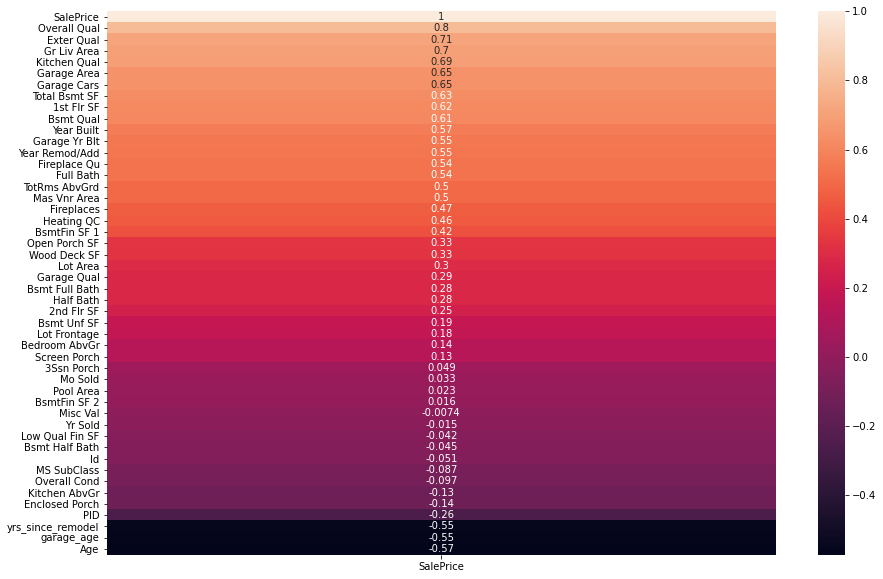

In [27]:
plt.subplots(figsize=(15,10))
sns.heatmap(ames_df_nona.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True);

**Correlation heatmap:** We see strong correlations between sales and overall quality and above-ground living area. There are also strong correlations with the garage area, garage number of cars, total basement square feet, and 1st floor square feet (all between 0.62 and 0.65). There are strong negative correlations with Years Since Remodel, Garage Age, and Age - to be expected, since the value will go down the older the house is.

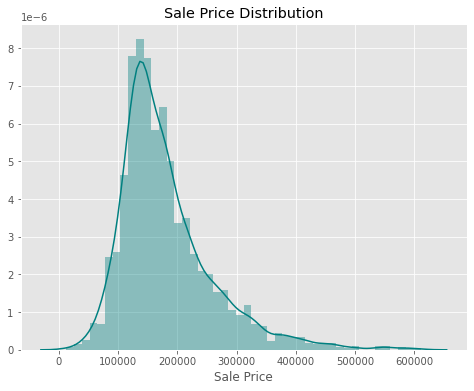

In [28]:
plt.style.use('ggplot')
plt.subplots(figsize=(8,6))
sns.distplot(ames_df_nona['SalePrice'], color='teal')
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price');

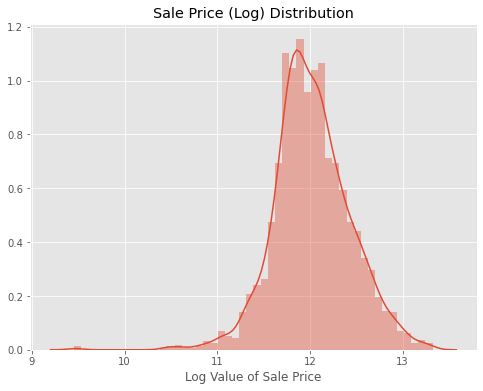

In [29]:
plt.subplots(figsize=(8,6))
sns.distplot(np.log(ames_df_nona['SalePrice']))
plt.title('Sale Price (Log) Distribution')
plt.xlabel('Log Value of Sale Price');

**Sale price distribution:** Most houses sold somewhere between \\$100,000 and \\$200,000, but there is a long tail that reaches just beyond \\$600,000. The log value of Sale Price changes the direction of the tail and appears to be more normally distributed, suggesting that a log value of the target might lead to a more robust model.

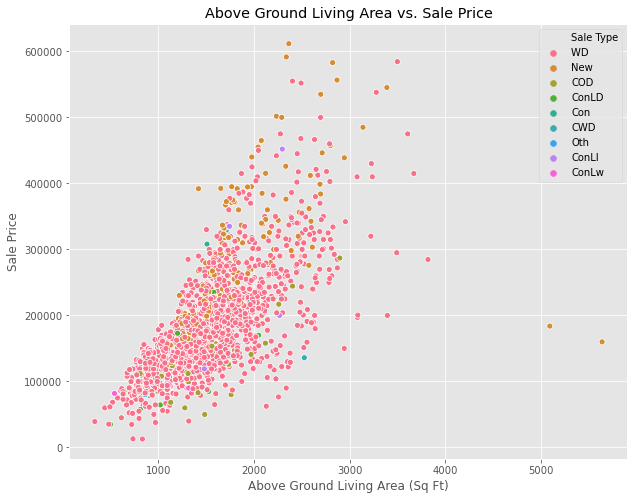

In [30]:
plt.subplots(figsize=(10,8))
sns.scatterplot('Gr Liv Area', 'SalePrice', data = ames_df_nona, hue = 'Sale Type')
plt.title('Above Ground Living Area vs. Sale Price')
plt.xlabel('Above Ground Living Area (Sq Ft)')
plt.ylabel('Sale Price');

**Gr Liv Area vs SalePrice, with Sale Type as hue:** It appears that new sales are generally higher, though there are 2 interesting outliers that sold for just under \\$200,000 while being larger than 5000 sq ft. These might be worth eliminating as outliers. Warranty Deed - conventional (blue dots) is clearly the most popular sale type.

In [31]:
mean_price = np.mean(ames_df_nona['SalePrice'])
mean_price

181469.70160897123

In [32]:
# https://datavizpyr.com/sort-boxplot-by-mean-with-seaborn-in-python/
sorted_index = ames_df_nona.groupby('Neighborhood')['SalePrice'].mean().sort_values().index

In [33]:
sorted_index

Index(['MeadowV', 'IDOTRR', 'BrDale', 'OldTown', 'BrkSide', 'Edwards', 'SWISU',
       'Landmrk', 'Sawyer', 'NPkVill', 'Blueste', 'NAmes', 'Mitchel',
       'SawyerW', 'Greens', 'Gilbert', 'NWAmes', 'Blmngtn', 'CollgCr',
       'Crawfor', 'ClearCr', 'Somerst', 'Timber', 'Veenker', 'GrnHill',
       'NoRidge', 'NridgHt', 'StoneBr'],
      dtype='object', name='Neighborhood')

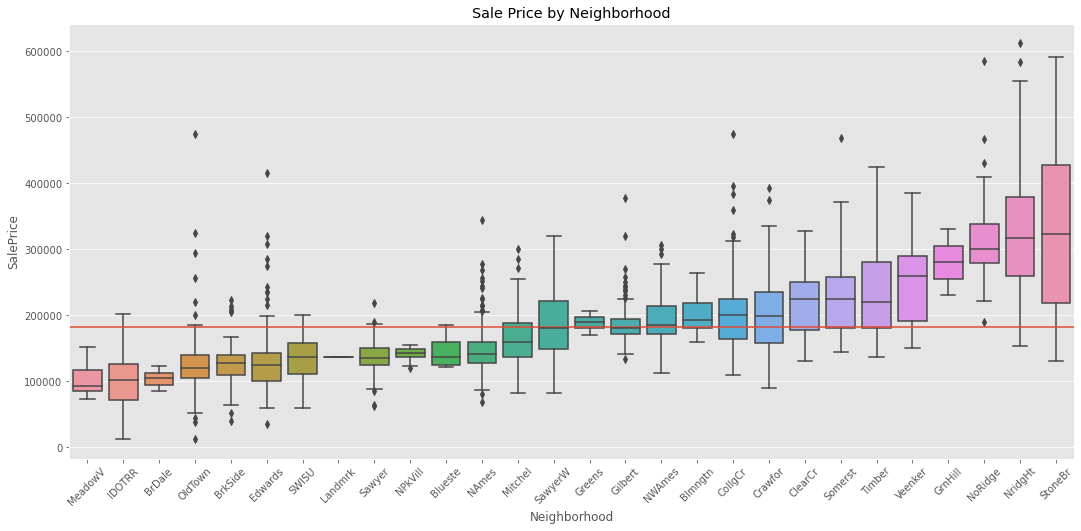

In [34]:
# Rotation from: https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib
# Mean line from: https://stackoverflow.com/questions/52005576/seaborn-boxplot-horizontal-line-annotation
fig, ax = plt.subplots(figsize=(18, 8))
sns.boxplot('Neighborhood', 'SalePrice', data = ames_df_nona, order=sorted_index, ax=ax)
plt.title('Sale Price by Neighborhood');
plt.xticks(rotation=45);
ax.axhline(y=mean_price);

**Sale Price by Neighborhood:** There is some clear variation in sale price by neighborhood. The blue line indicates the mean house value of the dataset. NoRidge and GrnHill stand out as the two neighborhoods that don't have any sale prices below the mean. This suggests that dummy variables of neighborhoods will likely be important to the model.

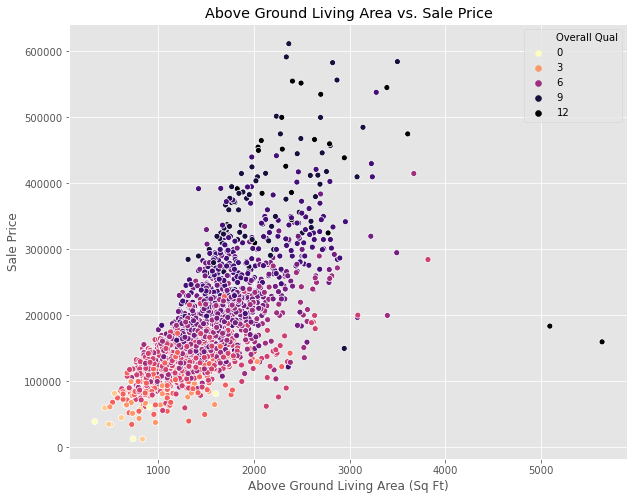

In [35]:
plt.subplots(figsize=(10, 8))
sns.scatterplot('Gr Liv Area', 'SalePrice', data = ames_df_nona, hue = 'Overall Qual', palette='magma_r')
plt.title('Above Ground Living Area vs. Sale Price')
plt.xlabel('Above Ground Living Area (Sq Ft)')
plt.ylabel('Sale Price');

**Above Ground Living Area vs Sale Price by Overall Quality:** This shows a clear correlation between both above ground living area and overall quality, indicating that these 2 features will likely be important for a strong model. 

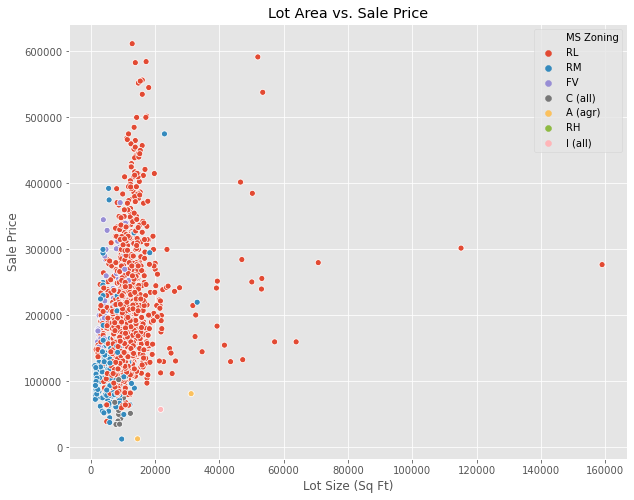

In [36]:
plt.subplots(figsize=(10, 8))
sns.scatterplot('Lot Area', 'SalePrice', data = ames_df_nona, hue = 'MS Zoning')
plt.title('Lot Area vs. Sale Price')
plt.xlabel('Lot Size (Sq Ft)')
plt.ylabel('Sale Price');

**Lot Area vs Sale Price including Zoning:** There still appears to be a few outliers on this scatterplot, indicating that I might have a stronger model if I eliminate any properties with a lot size greater than 30,000 square feet.

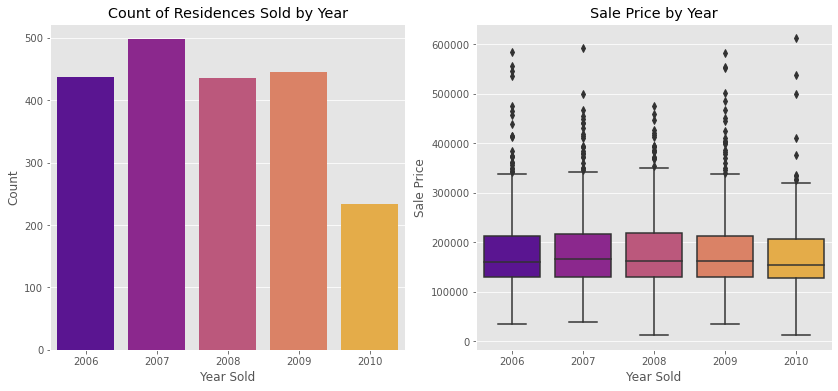

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.countplot('Yr Sold', data = ames_df_nona, palette='plasma')
plt.title('Count of Residences Sold by Year')
plt.xlabel('Year Sold')
plt.ylabel('Count');

plt.subplot(1, 2, 2)
sns.boxplot('Yr Sold', 'SalePrice', data=ames_df_nona, palette='plasma')
plt.title('Sale Price by Year')
plt.xlabel('Year Sold')
plt.ylabel('Sale Price');

**Count of Residences Sold and Sale Price by Year:** This shows that we have a relatively even distribution of sale prices across the time span. The distribution of count is also relatively even, with a drop off in 2010, most likely due to not collecting data for the full year of 2010.  

Though this is good news for our ability to build a strong model without time series adjustments, I am a bit surprised, since this data spans the 2008 financial and housing crisis.

### Additional Data Cleaning and Feature Engineering

Based on the information in the charts and plots above, there are additional steps to be taken with data cleaning and feature engineering:

1. Removing "Gr Liv Area" outliers: values above 4000 sq ft
2. Removing "Lot Size" outliers: values above 30,000 sq ft
3. Polynomial feature engineering to enhance the strength of selected highly correlated features

Removing these outliers will remove 25 rows from the training dataset, which still leaves plenty of training data for building a robust model.

In [38]:
# Lot area outliers:
ames_df_nona = ames_df_nona[ames_df_nona['Lot Area'] < 30_000]

In [39]:
# Gr liv area outliers:
ames_df_nona = ames_df_nona[ames_df_nona['Gr Liv Area'] < 4000]

In [40]:
# Polynomial features, training data:
ames_df_nona['OverallQual_GrLivArea'] = ames_df_nona['Overall Qual'] * ames_df_nona['Gr Liv Area']
ames_df_nona['GarageArea_Cars'] = ames_df_nona['Garage Area'] * ames_df_nona['Garage Cars']
ames_df_nona['Age_RemodAge'] = ames_df_nona['Age'] * ames_df_nona['yrs_since_remodel']
ames_df_nona['FullBath_RmsAbvGrd'] = ames_df_nona['Full Bath'] * ames_df_nona['TotRms AbvGrd']

In [41]:
# Polynomial features, test data:
ames_df_test_nona['OverallQual_GrLivArea'] = ames_df_test_nona['Overall Qual'] * ames_df_test_nona['Gr Liv Area']
ames_df_test_nona['GarageArea_Cars'] = ames_df_test_nona['Garage Area'] * ames_df_test_nona['Garage Cars']
ames_df_test_nona['Age_RemodAge'] = ames_df_test_nona['Age'] * ames_df_test_nona['yrs_since_remodel']
ames_df_test_nona['FullBath_RmsAbvGrd'] = ames_df_test_nona['Full Bath'] * ames_df_test_nona['TotRms AbvGrd']

In [42]:
ames_df_nona.shape

(2026, 88)

In [43]:
ames_df_test_nona.shape

(878, 87)

In [44]:
ames_df_nona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2050
Data columns (total 88 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MS Zoning              2026 non-null   object 
 1   Street                 2026 non-null   object 
 2   Alley                  2026 non-null   object 
 3   Lot Shape              2026 non-null   object 
 4   Land Contour           2026 non-null   object 
 5   Utilities              2026 non-null   object 
 6   Lot Config             2026 non-null   object 
 7   Land Slope             2026 non-null   object 
 8   Neighborhood           2026 non-null   object 
 9   Condition 1            2026 non-null   object 
 10  Condition 2            2026 non-null   object 
 11  Bldg Type              2026 non-null   object 
 12  House Style            2026 non-null   object 
 13  Roof Style             2026 non-null   object 
 14  Roof Matl              2026 non-null   object 
 15  Exte

In [45]:
ames_df_test_nona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 87 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MS Zoning              878 non-null    object 
 1   Street                 878 non-null    object 
 2   Alley                  878 non-null    object 
 3   Lot Shape              878 non-null    object 
 4   Land Contour           878 non-null    object 
 5   Utilities              878 non-null    object 
 6   Lot Config             878 non-null    object 
 7   Land Slope             878 non-null    object 
 8   Neighborhood           878 non-null    object 
 9   Condition 1            878 non-null    object 
 10  Condition 2            878 non-null    object 
 11  Bldg Type              878 non-null    object 
 12  House Style            878 non-null    object 
 13  Roof Style             878 non-null    object 
 14  Roof Matl              878 non-null    object 
 15  Exteri

### Saving Clean Data

Now that I have cleaned and feature engineered the data, I will save clean files for modeling.

In [46]:
ames_df_nona.to_csv('./datasets/train_clean.csv', index=False)

In [47]:
ames_df_test_nona.to_csv('./datasets/test_clean.csv', index=False)